In [1]:
import pandas as pd
from gensim.models import Word2Vec
import networkx as nx
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [2]:
# 테이블 형태의 파일을 입력으로 받습니다. 이것은 CSV, Excel 또는 SQL 데이터베이스에서 오는 데이터일 수 있습니다.
df = pd.read_csv('network.csv')

In [3]:
df.head()

,이름,강점1,강점2,강점3,강점4,강점5
0,서민우,책임,개별화,신념,개발,발상
1,안정훈,심사숙고,회고,절친,배움,분석
2,손정호,회고,공정성,배움,집중,지적사고
3,신우섭,화합,공정성,절친,지적사고,체계
4,안진영,성취,절친,긍정,배움,책임


In [4]:
# 문자열 열을 연결
df['text_column'] = df['강점1'] + ' ' + df['강점2'] + ' ' + df['강점3'] + ' ' + df['강점4'] + ' ' + df['강점5']

In [46]:
#테이블의 텍스트 데이터를 토큰화해야 합니다. 이것은 각 문서를 개별 단어로 분할하는 과정입니다. 
#이 과정은 자연어 처리(NLP)에서 매우 중요합니다. 여기서는 간단히 공백으로 문장을 분할합니다.
df['tokenized_text'] = df['text_column'].apply(lambda x: x.split())

In [47]:
df.head()

,이름,강점1,강점2,강점3,강점4,강점5,text_column,tokenized_text
0,서민우,책임,개별화,신념,개발,발상,책임 개별화 신념 개발 발상,"[책임, 개별화, 신념, 개발, 발상]"
1,안정훈,심사숙고,회고,절친,배움,분석,심사숙고 회고 절친 배움 분석,"[심사숙고, 회고, 절친, 배움, 분석]"
2,손정호,회고,공정성,배움,집중,지적사고,회고 공정성 배움 집중 지적사고,"[회고, 공정성, 배움, 집중, 지적사고]"
3,신우섭,화합,공정성,절친,지적사고,체계,화합 공정성 절친 지적사고 체계,"[화합, 공정성, 절친, 지적사고, 체계]"
4,안진영,성취,절친,긍정,배움,책임,성취 절친 긍정 배움 책임,"[성취, 절친, 긍정, 배움, 책임]"


In [48]:
# 워드벡터를 생성합니다. gensim의 Word2Vec 모델을 사용합니다. 
#이 모델은 컴퓨터가 단어 간의 관계를 이해할 수 있도록 단어를 수치 벡터로 변환합니다.
model = Word2Vec(df['tokenized_text'].values, window=100, min_count=1, workers=4)
model.save("word2vec.model")

In [39]:
# 각 단어의 워드벡터를 가져와 코사인 유사도를 계산합니다. 이것은 단어 간의 유사성을 수치화합니다.
vectors = model.wv[model.wv.key_to_index]
similarity_matrix = cosine_similarity(vectors)

In [52]:
similarity_matrix.shape

(54, 54)

In [41]:
# 유사도 매트릭스를 기반으로 네트워크 그래프를 만듭니다. networkx를 사용합니다.
G = nx.from_numpy_matrix(similarity_matrix)

In [42]:
#이제 네트워크 분석을 수행할 수 있습니다.
# 그래프에서 연결 중심성 계산
centrality = nx.degree_centrality(G)

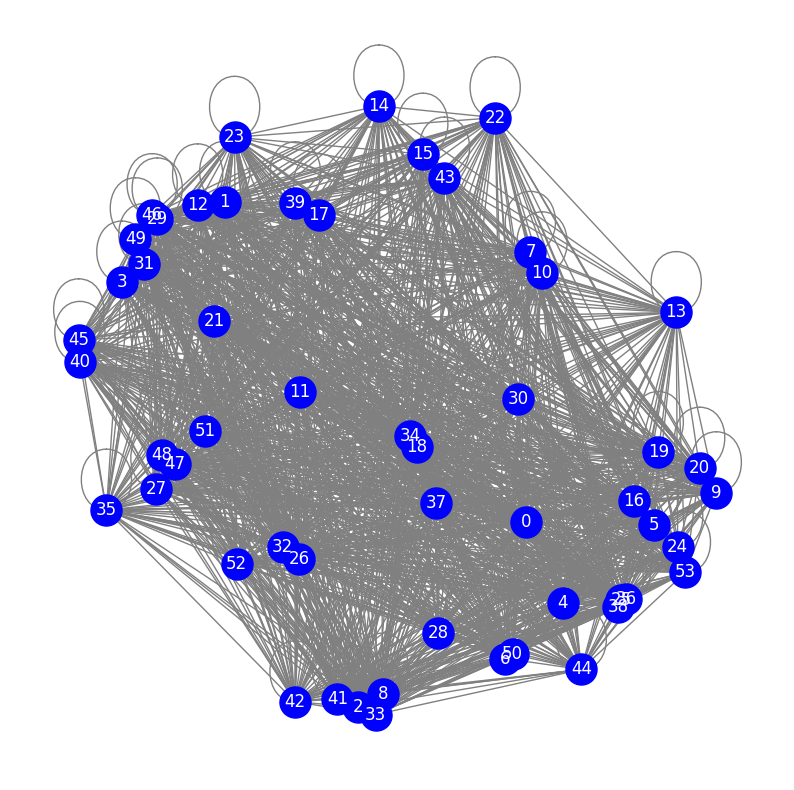

In [43]:
# 그래프 시각화
#nx.draw(G, with_labels=True)
#plt.show()
plt.figure(figsize=(10, 10))  # 그래프 크기 조정
pos = nx.spring_layout(G)  # 노드의 위치를 Fruchterman-Reingold force-directed algorithm을 사용하여 배치

nx.draw_networkx_nodes(G, pos, node_size=500, node_color='blue')  # 노드 그리기
nx.draw_networkx_edges(G, pos, edge_color='grey')  # 엣지 그리기
nx.draw_networkx_labels(G, pos, font_size=12, font_color='white')  # 레이블 그리기

plt.axis('off')  # 축 끄기
plt.show()  # 그래프 보여주기